<a href="https://colab.research.google.com/github/sourchen/FitBit-User-Analysis/blob/main/Bellabeat_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Connect to drive
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

%cd gdrive/MyDrive/resume/作品集/Bellabeat Case Study

!ls

# FitBit User Analysis and Forming Smartwatch Marketing Strategy.
### by Ashley Chen

### Dataset Overview

> These datasets were generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. Individual reports can be parsed by export session ID (column A) or timestamp (column B). Variation between output represents the use of different types of Fitbit trackers and individual tracking behaviours/preferences. There was no metadata provided. **Limitations such as the size of data sample and the fact that not knowing key information such as participants' demographic characteristics, lifestyle, time location, weather indicators, activity tracker usage , unfortunately, would limit the scope of analysis that can be performed.**


* Data Source: [Kaggle FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit#)


### Problem Statement
**Background:** This is a case study for Bellabeat: a high-tech company founded in 2013, focusing on designing health smart products for women. The company is currently in a rapid growth phase and has three major product lines: Leaf, Time, and Spring. These smart products can track and collect user activity data and connect with the Bellabeat app, allowing users to gain deeper insights into their health status, habits, sleep quality, and more. Additionally, Bellabeat offers a subscription-based membership system that provides personalized health guidance based on users' lifestyles and goals.

> Now, Bellabeat wants to know:
> 1. The current trends in user health and product usage among competitors.
> 2. How these trends can be applied to optimize Bellabeat's product design and marketing strategy?

> And report to the stakeholders, including the Bellabeat cofounder and marketing team.

# 1 Assessing and Cleaning the data

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime as dt

import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
# load data
d_activity_df = pd.read_csv('dataset/dailyActivity_merged.csv')
s_heartrate_df = pd.read_csv('dataset/heartrate_seconds_merged.csv')
d_sleep_df = pd.read_csv('dataset/sleepDay_merged.csv')
weight_df = pd.read_csv('dataset/weightLogInfo_merged.csv')
hourly_activity_df = pd.read_csv('dataset/hourlyIntensities_merged.csv') 
hourly_step_df = pd.read_csv('dataset/hourlySteps_merged.csv') 
hourly_cal_df = pd.read_csv('dataset/hourlyCalories_merged.csv')

In [4]:
def df_info(df): 

    """ print DataFrame info """

    obs = df.shape[0]
    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    nuniques = df.apply(lambda x: x.nunique())
    nulls = df.apply(lambda x: x.isnull().sum())
    missing_ration = (df.isnull().sum()/ obs) * 100
    skewness = df.skew()
    
    cols = ['types', 'counts', 'nulls', 'missing ratio', 'nuniques', 'skewness']
    info = pd.concat([types, counts, nulls, missing_ration, nuniques, skewness], axis = 1, sort=True)
    info.columns = cols
    
    print("There are ", df.shape[1], " columns and ", df.shape[0], " rows in dataset.")
    print("There are ", df[df.duplicated()].shape[0], " duplicated rows in dataset.")
    print('___________________________\nData types:\n',info.types.value_counts())
    print('___________________________')
    print('Descriptive statistics of the numeric features in the dataset: ')
    print(df.describe())
    return info

In [5]:
d_activity_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [6]:
details = df_info(d_activity_df)
display(details.sort_values(by='missing ratio', ascending=False))

There are  15  columns and  940  rows in dataset.
There are  0  duplicated rows in dataset.
___________________________
Data types:
 int64      7
float64    7
object     1
Name: types, dtype: int64
___________________________
Descriptive statistics of the numeric features in the dataset: 
                 Id    TotalSteps  TotalDistance  TrackerDistance  \
count  9.400000e+02    940.000000     940.000000       940.000000   
mean   4.855407e+09   7637.910638       5.489702         5.475351   
std    2.424805e+09   5087.150742       3.924606         3.907276   
min    1.503960e+09      0.000000       0.000000         0.000000   
25%    2.320127e+09   3789.750000       2.620000         2.620000   
50%    4.445115e+09   7405.500000       5.245000         5.245000   
75%    6.962181e+09  10727.000000       7.712500         7.710000   
max    8.877689e+09  36019.000000      28.030001        28.030001   

       LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
count  

<ipython-input-4-722a9f02e543>:11: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = df.skew()


,types,counts,nulls,missing ratio,nuniques,skewness
ActivityDate,object,940,0,0.0,31,NaN
Calories,int64,940,0,0.0,734,0.422450
FairlyActiveMinutes,int64,940,0,0.0,81,2.479492
Id,int64,940,0,0.0,33,0.177125
LightActiveDistance,float64,940,0,0.0,491,0.182247
LightlyActiveMinutes,int64,940,0,0.0,335,-0.037929
LoggedActivitiesDistance,float64,940,0,0.0,19,6.297440
ModeratelyActiveDistance,float64,940,0,0.0,211,2.771194
SedentaryActiveDistance,float64,940,0,0.0,9,8.589899
SedentaryMinutes,int64,940,0,0.0,549,-0.294498


In [7]:
s_heartrate_df.head()

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101


In [8]:
details = df_info(s_heartrate_df)
display(details.sort_values(by='missing ratio', ascending=False))

<ipython-input-4-722a9f02e543>:11: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = df.skew()


There are  3  columns and  2483658  rows in dataset.
There are  0  duplicated rows in dataset.
___________________________
Data types:
 int64     2
object    1
Name: types, dtype: int64
___________________________
Descriptive statistics of the numeric features in the dataset: 
                 Id         Value
count  2.483658e+06  2.483658e+06
mean   5.513765e+09  7.732842e+01
std    1.950224e+09  1.940450e+01
min    2.022484e+09  3.600000e+01
25%    4.388162e+09  6.300000e+01
50%    5.553957e+09  7.300000e+01
75%    6.962181e+09  8.800000e+01
max    8.877689e+09  2.030000e+02


,types,counts,nulls,missing ratio,nuniques,skewness
Id,int64,2483658,0,0.0,14,0.076457
Time,object,2483658,0,0.0,961274,NaN
Value,int64,2483658,0,0.0,168,1.348833


In [9]:
d_sleep_df.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [10]:
details = df_info(d_sleep_df)
display(details.sort_values(by='missing ratio', ascending=False))

There are  5  columns and  413  rows in dataset.
There are  3  duplicated rows in dataset.
___________________________
Data types:
 int64     4
object    1
Name: types, dtype: int64
___________________________
Descriptive statistics of the numeric features in the dataset: 
                 Id  TotalSleepRecords  TotalMinutesAsleep  TotalTimeInBed
count  4.130000e+02         413.000000          413.000000      413.000000
mean   5.000979e+09           1.118644          419.467312      458.639225
std    2.060360e+09           0.345521          118.344679      127.101607
min    1.503960e+09           1.000000           58.000000       61.000000
25%    3.977334e+09           1.000000          361.000000      403.000000
50%    4.702922e+09           1.000000          433.000000      463.000000
75%    6.962181e+09           1.000000          490.000000      526.000000
max    8.792010e+09           3.000000          796.000000      961.000000


<ipython-input-4-722a9f02e543>:11: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = df.skew()


,types,counts,nulls,missing ratio,nuniques,skewness
Id,int64,413,0,0.0,24,0.028324
SleepDay,object,413,0,0.0,31,NaN
TotalMinutesAsleep,int64,413,0,0.0,256,-0.614977
TotalSleepRecords,int64,413,0,0.0,3,2.885607
TotalTimeInBed,int64,413,0,0.0,242,-0.218636


In [11]:
weight_df.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [12]:
details = df_info(weight_df)
display(details.sort_values(by='missing ratio', ascending=False))

There are  8  columns and  67  rows in dataset.
There are  0  duplicated rows in dataset.
___________________________
Data types:
 float64    4
int64      2
object     1
bool       1
Name: types, dtype: int64
___________________________
Descriptive statistics of the numeric features in the dataset: 
                 Id    WeightKg  WeightPounds       Fat        BMI  \
count  6.700000e+01   67.000000     67.000000   2.00000  67.000000   
mean   7.009282e+09   72.035821    158.811801  23.50000  25.185224   
std    1.950322e+09   13.923206     30.695415   2.12132   3.066963   
min    1.503960e+09   52.599998    115.963147  22.00000  21.450001   
25%    6.962181e+09   61.400002    135.363832  22.75000  23.959999   
50%    6.962181e+09   62.500000    137.788914  23.50000  24.389999   
75%    8.877689e+09   85.049999    187.503152  24.25000  25.559999   
max    8.877689e+09  133.500000    294.317120  25.00000  47.540001   

              LogId  
count  6.700000e+01  
mean   1.461772e+12  
st

<ipython-input-4-722a9f02e543>:11: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = df.skew()


,types,counts,nulls,missing ratio,nuniques,skewness
Fat,float64,2,65,97.014925,2,NaN
BMI,float64,67,0,0.000000,36,6.000242
Date,object,67,0,0.000000,56,NaN
Id,int64,67,0,0.000000,8,-1.190147
IsManualReport,bool,67,0,0.000000,2,-0.470012
LogId,int64,67,0,0.000000,56,0.005850
WeightKg,float64,67,0,0.000000,34,1.369669
WeightPounds,float64,67,0,0.000000,34,1.369669


## Concat dataset

In [13]:
# ActivityDate's type is string
d_activity_df['ActivityDate'] = pd.to_datetime(d_activity_df.ActivityDate)
d_sleep_df['SleepDay'] = pd.to_datetime(d_sleep_df.SleepDay)
hourly_activity_df['ActivityHour'] = pd.to_datetime(hourly_activity_df.ActivityHour)
hourly_step_df['ActivityHour'] = pd.to_datetime(hourly_step_df.ActivityHour)
hourly_cal_df['ActivityHour'] = pd.to_datetime(hourly_cal_df.ActivityHour)

In [14]:
# drop duplicates
d_sleep_df = d_sleep_df.drop_duplicates()

In [16]:
d_df = pd.merge(d_activity_df, d_sleep_df, left_on=  ['Id', 'ActivityDate'],
                                        right_on= ['Id', 'SleepDay'], 
                                        how = 'left')

In [17]:
h_df = pd.merge(hourly_activity_df, hourly_step_df, on=  ['Id', 'ActivityHour'], how = 'left')
h_df = pd.merge(h_df, hourly_cal_df, on=  ['Id', 'ActivityHour'], how = 'left')

In [18]:
d_df.reset_index(drop=True)
d_df.to_csv('daily.csv', index=False)

# 2 Exploratory data analysis

## Outlier

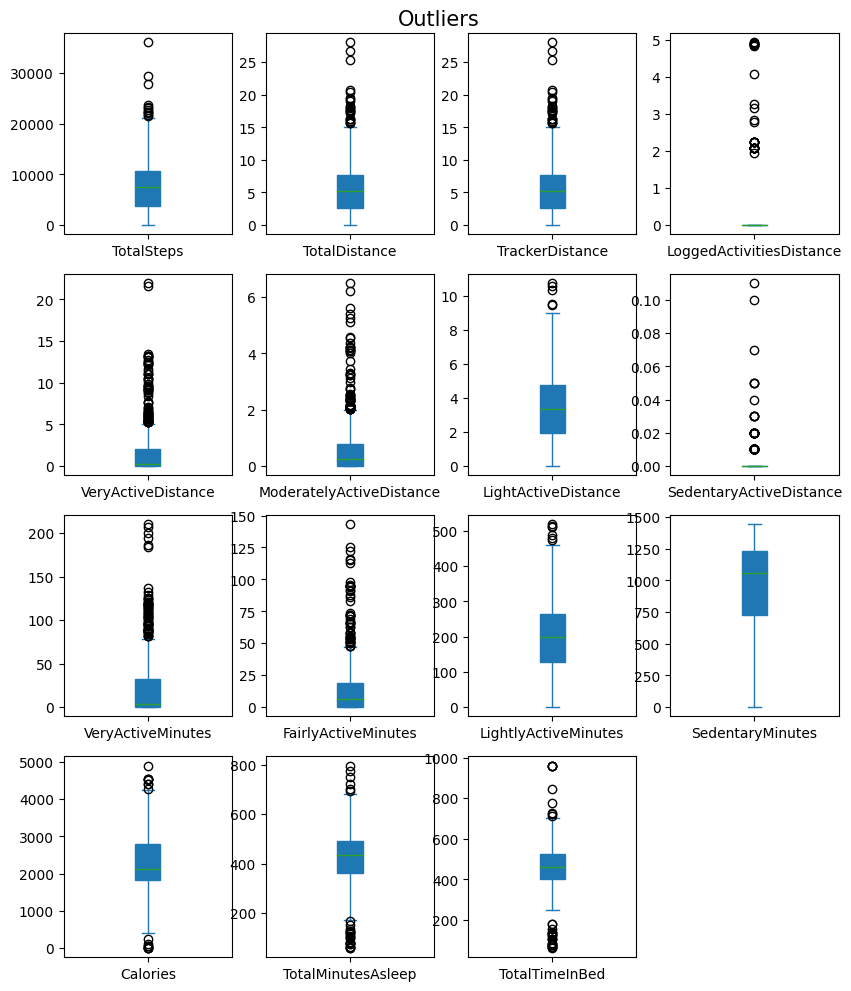

In [20]:
# select column to plot (not select binary column)
col = ['Id', 'ActivityDate', 'SleepDay', 'TotalSleepRecords']
df_to_plot = d_df.drop(columns=col).select_dtypes(include=np.number)

# subplots
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(10,12), patch_artist=True)
plt.suptitle('Outliers', fontsize=15, y=0.9)
plt.savefig('boxplots.png', bbox_inches='tight')

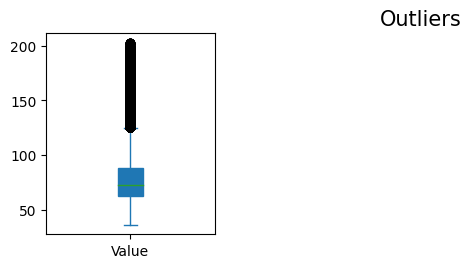

In [21]:
# select column to plot (not select binary column)
col = ['Id']
df_to_plot = s_heartrate_df.drop(columns=col).select_dtypes(include=np.number)

df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(10,12), patch_artist=True)
plt.suptitle('Outliers', fontsize=15, y=0.9)
plt.savefig('boxplots.png', bbox_inches='tight')

> Although some features have outliers, such as `TotalDistance` 25, which indicates that a user has traveled 25 kilometers in a day, they are within a **reasonable range that is humanly feasible**. Therefore, after evaluation, we have decided not to remove the outliers.



## feature engineering

In [22]:
d_df['week'] = d_df['ActivityDate'].dt.strftime('%W')
d_df['weekday'] = d_df['ActivityDate'].dt.strftime('%A')

h_df['Date'] = h_df['ActivityHour'].dt.strftime('%m/%d')
h_df['ActivityDate'] = pd.to_datetime(h_df.ActivityHour)
h_df['Hour'] = h_df['ActivityHour'].dt.strftime("%H:%M")
h_df['weekday'] = h_df['ActivityHour'].dt.strftime("%A")

## Anomalies: Remove non-active record

Some users were found to have data where the device was not used, such as `TotalSteps` being 0 or `SedentaryMinutes` being 1440 (indicating no movement throughout the day). 

These abnormal data can affect the determination of user activity, such as lowering the average value. Therefore, using `TotalSteps` as a criterion, the data from these unused devices were removed.

In [23]:
analysis_df = d_df[d_df['TotalSteps'] != 0]

In [24]:
non_active_day = d_df[d_df['TotalSteps'] == 0][['Id', 'ActivityDate']]
non_active_day.head()

,Id,ActivityDate
30,1503960366,2016-05-12
104,1844505072,2016-04-24
105,1844505072,2016-04-25
106,1844505072,2016-04-26
112,1844505072,2016-05-02


In [25]:
# merge dataframes on Id and ActivityDate columns
merged = h_df.merge(non_active_day, on=['Id', 'ActivityDate'], how='left', indicator=True)

# filter out rows that are in h_df but not in non_active_day
analysis_hf = merged[merged['_merge'] == 'left_only'].drop('_merge', axis=1)

print(analysis_hf.head())

           Id        ActivityHour  TotalIntensity  AverageIntensity  \
0  1503960366 2016-04-12 00:00:00              20          0.333333   
1  1503960366 2016-04-12 01:00:00               8          0.133333   
2  1503960366 2016-04-12 02:00:00               7          0.116667   
3  1503960366 2016-04-12 03:00:00               0          0.000000   
4  1503960366 2016-04-12 04:00:00               0          0.000000   

   StepTotal  Calories   Date        ActivityDate   Hour  weekday  
0        373        81  04/12 2016-04-12 00:00:00  00:00  Tuesday  
1        160        61  04/12 2016-04-12 01:00:00  01:00  Tuesday  
2        151        59  04/12 2016-04-12 02:00:00  02:00  Tuesday  
3          0        47  04/12 2016-04-12 03:00:00  03:00  Tuesday  
4          0        48  04/12 2016-04-12 04:00:00  04:00  Tuesday  


## Store Clean Data

In [26]:
analysis_df.reset_index(drop=True)
analysis_df.to_csv('analysis_df.csv', index=False)

analysis_hf.reset_index(drop=True)
analysis_hf.to_csv('analysis_hf.csv', index=False)

<ipython-input-27-51e535cd60d7>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  s = sns.heatmap(df_to_plot.corr(),  cmap = 'RdBu',vmin = -1, vmax = 1,center = 0)


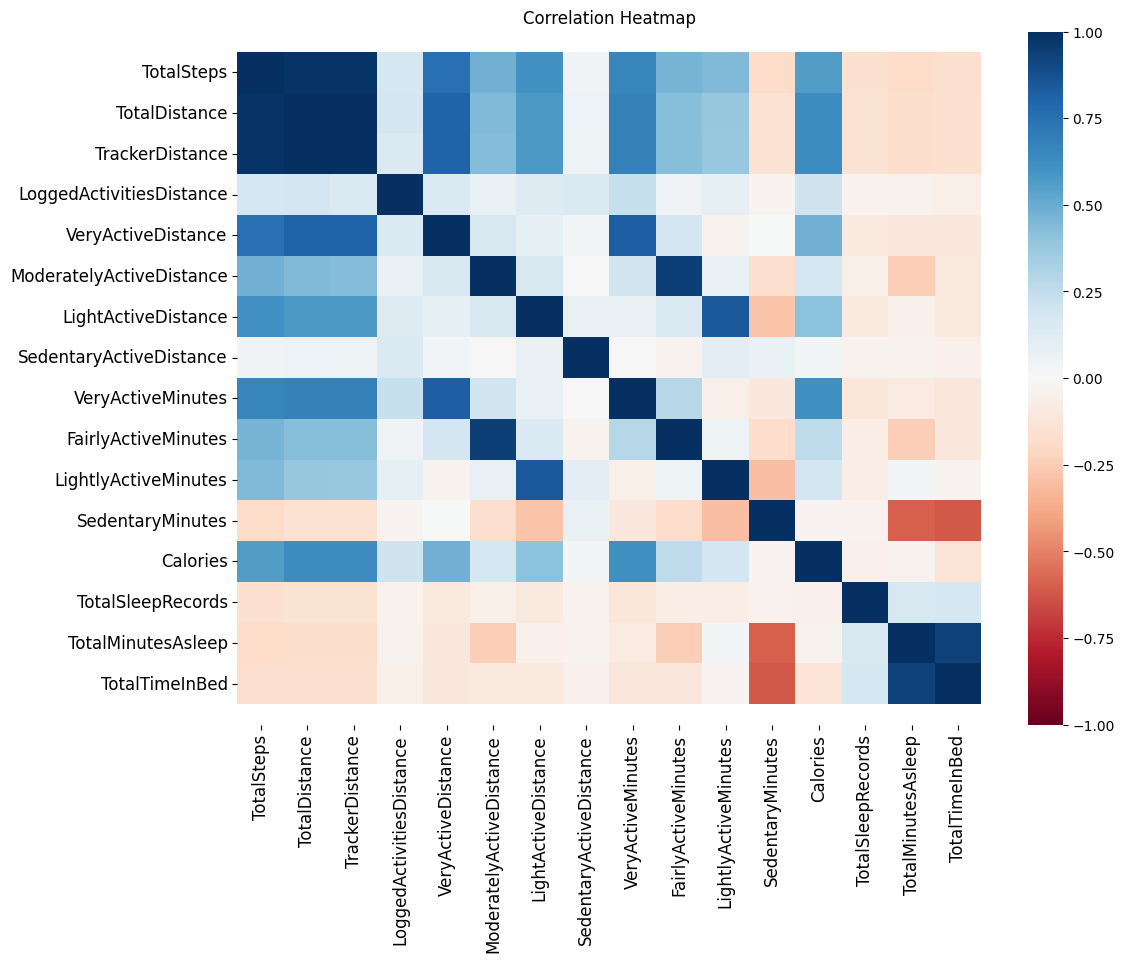

In [27]:
# select columns to plot
df_to_plot = analysis_df.drop(columns=['Id'])

# create heatmap
plt.figure(figsize = (12, 9))
s = sns.heatmap(df_to_plot.corr(),  cmap = 'RdBu',vmin = -1, vmax = 1,center = 0)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
bottom, top = s.get_ylim()
s.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Correlation Heatmap")
plt.show()

# 3 Analysis

## 3-1 Daily Active Users (DAU)


In [29]:
df_to_plot = analysis_df.groupby('ActivityDate').agg({'Id': 'count'})

# Reset the index to a simple RangeIndex
df_to_plot = df_to_plot.reset_index()

# change the datetime format of the 'ActivityDate' column
df_to_plot['ActivityDate_MD'] = d_df['ActivityDate'].dt.strftime('%m/%d')

# calculate the 7-day rolling average
df_to_plot['rolling_average'] = df_to_plot['Id'].rolling(window=7).mean()

df_to_plot.head()

,ActivityDate,Id,ActivityDate_MD,rolling_average
0,2016-04-12,31,04/12,NaN
1,2016-04-13,31,04/13,NaN
2,2016-04-14,31,04/14,NaN
3,2016-04-15,33,04/15,NaN
4,2016-04-16,31,04/16,NaN


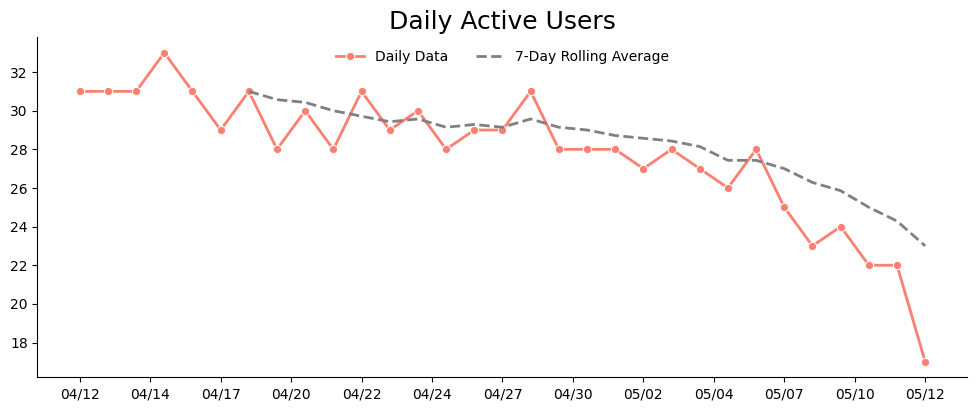

In [30]:
# Create a Seaborn figure
fig, ax = plt.subplots(figsize=(12, 4))

# Create the plot using seaborn
sns.lineplot(x='ActivityDate_MD', y='Id', data=df_to_plot, linewidth=2, color='salmon', label='Daily Data', ax=ax, marker='o')
sns.lineplot(x='ActivityDate_MD', y='rolling_average', data=df_to_plot, linewidth=2, color='gray', label='7-Day Rolling Average', ax=ax, linestyle='--')

# Set the x-axis format
ax.xaxis.set_major_locator(plt.MaxNLocator(16)) # Show every two days
ax.tick_params(axis='x')
ax.tick_params(axis='y')

# adjust the space between title, legend, and figure
plt.subplots_adjust(top=0.85, bottom=0)

# Set the plot area color to white with alpha=0
# ax.set_facecolor('#d9d9d9')

# Set the legend
ax.legend(loc='upper center', ncol=2, frameon=False)

# Set the figure borders
sns.despine(fig=fig, ax=ax, top=True, bottom=False, left=False, right=True)

# Add a title and label
plt.title('Daily Active Users', fontsize=18)
ax.set_xlabel('')
ax.set_ylabel('')
fig.savefig('Daily Active Users.png', transparent=True, bbox_inches='tight')

# Show the plot
plt.show()

> 💡 **Finding**: The daily active device users (DAU) of FitBit have been continuously declining.

## 3-2 Power User Curve

In [31]:
df_to_plot = analysis_df.groupby('Id').agg({'ActivityDate': 'count'})

# Reset the index to a simple RangeIndex
df_to_plot = df_to_plot.reset_index()

mau_df = df_to_plot.groupby('ActivityDate').agg({'Id': 'count'})

# Reset the index to a simple RangeIndex
mau_df = mau_df.reset_index()

mau_df['Id_percent'] = mau_df['Id']/33*100

mau_df.head()

,ActivityDate,Id,Id_percent
0,3,1,3.030303
1,17,3,9.090909
2,18,2,6.060606
3,19,1,3.030303
4,20,1,3.030303


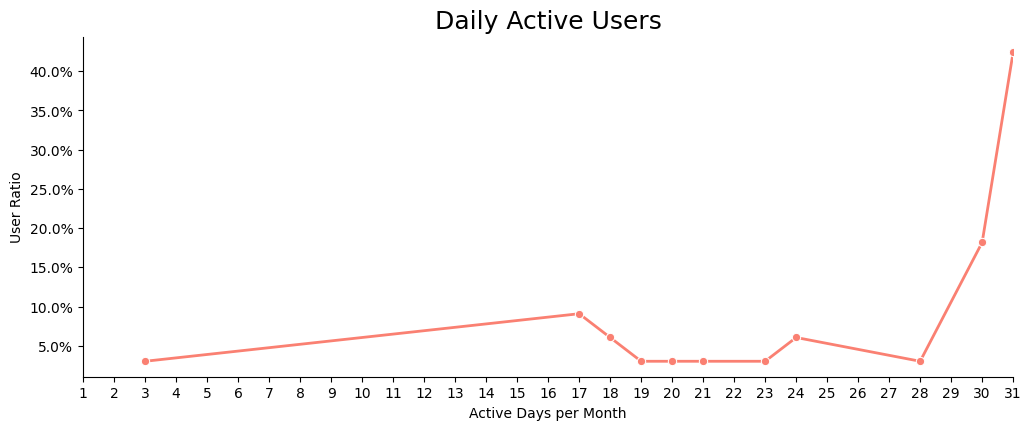

In [32]:
import matplotlib.ticker as mtick

# Create a Seaborn figure
fig, ax = plt.subplots(figsize=(12, 4))

# Create the plot using seaborn
sns.lineplot(x='ActivityDate', y='Id_percent', data=mau_df, linewidth=2, color='salmon', ax=ax, marker='o')

# Set the x-axis format
ax.xaxis.set_major_locator(plt.MaxNLocator(32)) # Show every two days
ax.tick_params(axis='x')
ax.tick_params(axis='y')

# format the y-axis as a percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# adjust the space between title, legend, and figure
plt.subplots_adjust(top=0.85, bottom=0)

# Set background color to white
sns.set_style("white")

# Set the legend
ax.legend(loc='upper center', ncol=2, frameon=False)

# set x-axis limits
plt.xlim(1, 31)

# Set the figure borders
sns.despine(fig=fig, ax=ax, top=True, bottom=False, left=False, right=True)

# Add a title and label
plt.title('Daily Active Users', fontsize=18)
ax.set_xlabel('Active Days per Month')
ax.set_ylabel('User Ratio')

fig.savefig('Power User Curve.png', transparent=True, bbox_inches='tight')

# Show the plot
plt.show()

> 💡 **Finding**: More than 40% of users are power users, who have been using the device for one month or more.

## 3-3 Hypothesis: The decreasing usage of users with low activity levels leads to an overall decline in usage.

### Labeling: User Segementation by Activity
According to each person's **daily average step count**, they will be categorized into the following four activity labels: 
- Sedentary: < 5,000 steps
- Lightly: 5,000 - 7,499 steps
- Fairly: 7,500 - 9,999 steps
- VeryActive: 10,000 steps

In [33]:
# User daily average step count
user_seg_df = analysis_df.groupby(['Id']).agg({'TotalSteps': 'mean'})

# Reset the index to a simple RangeIndex
user_seg_df = user_seg_df.reset_index()

# Classify data into bins
user_seg_df['activity_bin'] = pd.cut(user_seg_df['TotalSteps'], bins=[0, 5000, 7500, 10000, float('inf')], labels=['Sedentary', 'Lightly', 'Fairly', 'VeryActive'])

user_seg_df.head()

,Id,TotalSteps,activity_bin
0,1503960366,12520.633333,VeryActive
1,1624580081,5743.903226,Lightly
2,1644430081,7282.966667,Lightly
3,1844505072,3808.666667,Sedentary
4,1927972279,1670.588235,Sedentary


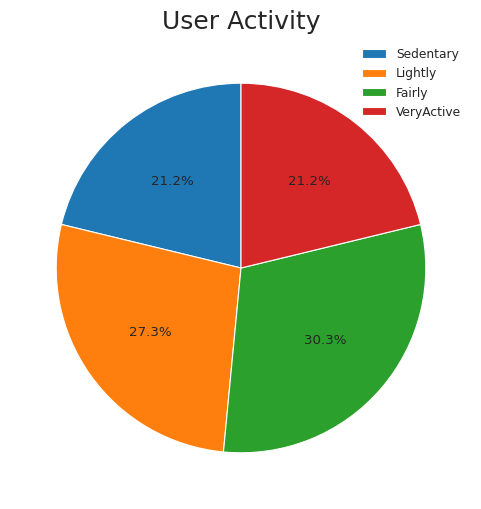

In [34]:
counts = user_seg_df.groupby('activity_bin').size()

plt.figure(figsize=(6, 6))
plt.title('User Activity', fontsize=18)

colors = sns.set_palette(sns.color_palette("dark:salmon_r"))
sns.set_context('paper')

# Create the plot using seaborn
plt.pie(counts, labels=None, autopct='%1.1f%%', startangle=90, colors=colors)

# Add legend
plt.legend(counts.index, loc='upper right', frameon=False)
plt.savefig('User Activity.png', transparent=True, bbox_inches='tight')

plt.show()

In [35]:
# join user segement label
analysis_df = pd.merge(analysis_df, user_seg_df[['Id', 'activity_bin']], on='Id')
analysis_hf = pd.merge(analysis_hf, user_seg_df[['Id', 'activity_bin']], on='Id')


> 💡 **Finding**:
> 1. **Fairly active users are the largest** group of users, accounting for 30.3% of the total number of users.
> 2. According to the **"daily average step count"** of each user during the data period, users are divided into four groups based on their activity level, and the daily changes in usage of each group are observed.
  - The number of Sedentary users fluctuates greatly, ranging from 3 to 7 users.
  - After using the device for two weeks, there is **an increase in user churn**, especially among **lightly activity users**, who lost 66% of their original 9 users, leaving only 3 users.
  - **Strong activity users have almost no interruptions in usage**, maintaining a stable user count of about 7.

> In a nutshell, FitBit needs to focus on retaining lightly activity users, as they account for 30.3% of the total user base.

### Daily Active User By Activities

In [36]:
# Daily Active User in each activity label
dau_seg_df = analysis_df.groupby(['activity_bin', 'ActivityDate']).agg({'Id': 'count'})
dau_seg_df = dau_seg_df.reset_index()

# change the datetime format of the 'ActivityDate' column
dau_seg_df['ActivityDate_MD'] = dau_seg_df['ActivityDate'].dt.strftime('%m/%d')

dau_seg_df.head()

,activity_bin,ActivityDate,Id,ActivityDate_MD
0,Sedentary,2016-04-12,6,04/12
1,Sedentary,2016-04-13,6,04/13
2,Sedentary,2016-04-14,7,04/14
3,Sedentary,2016-04-15,7,04/15
4,Sedentary,2016-04-16,6,04/16


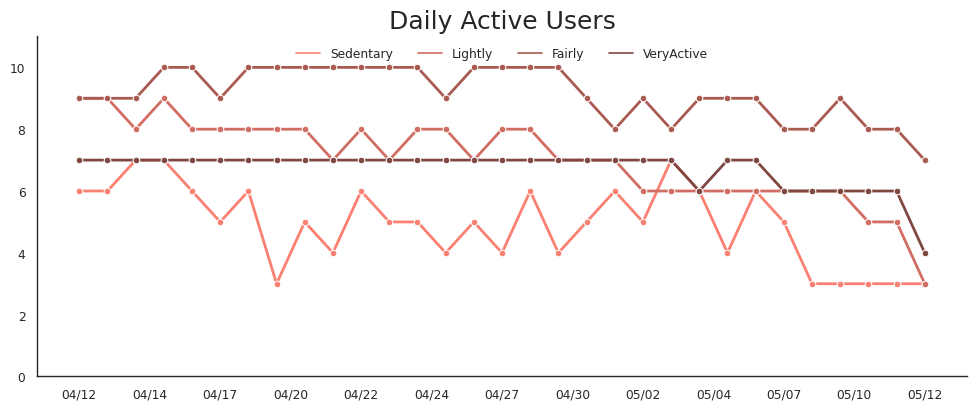

In [37]:
# Create a Seaborn figure
fig, ax = plt.subplots(figsize=(12, 4))

colors = sns.set_palette(sns.color_palette("dark:salmon_r"))

# Create the plot using seaborn
sns.lineplot(x='ActivityDate_MD', y='Id', data=dau_seg_df, linewidth=2, ax=ax, marker='o', hue='activity_bin',  palette=colors)

# Set the x-axis format
ax.xaxis.set_major_locator(plt.MaxNLocator(16)) # Show every two days
ax.tick_params(axis='x')
ax.tick_params(axis='y') # Add arrow to y-axis

# set the y-axis limits
ax.set_ylim(0, 11)

# adjust the space between title, legend, and figure
plt.subplots_adjust(top=0.85, bottom=0)


# Set the legend
ax.legend(loc='upper center', ncol=4, frameon=False)

# Set the figure borders
sns.despine(fig=fig, ax=ax, top=True, bottom=False, left=False, right=True)

# Add a title and label
plt.title('Daily Active Users', fontsize=18)
ax.set_xlabel('')
ax.set_ylabel('')
plt.savefig('Daily Active Users by Activity.png', transparent=True, bbox_inches='tight')

# Show the plot
plt.show()

💡 **Finding**

Using the "average steps" of users during the data interval as the standard for user activity, users are divided into three groups, and the daily usage of each group is observed:

*   The High group accounts for about 21.2% of users. As users hardly decrease, it indicates that most users in this group will continue to use the device.
*   The Medium group accounts for about half (57.6%) of users. The number of users in this group noticeably decreases after about two weeks (4/26).
*   The Low group accounts for 21.6% of users. Because the daily user usage varies greatly, it indicates that most users in this group do not continue to use the device.
The above findings prove that the overall usage rate has decreased due to the decrease in usage rate of users with moderate activity.

Reasons for the decrease in usage rate of users with moderate activity: interruption of use

Battery life
Discomfort
Function does not meet needs
System malfunction (unable to connect to the app)
Further exploration is needed for these aspects.

In [38]:
analysis_df['Date'] = analysis_df['ActivityDate'].dt.strftime('%m/%d')

# Pivot the table to get a new DataFrame with users as rows, dates as columns, and ActivityHour as values
df_pivot = analysis_df.pivot(index='Id', columns='Date', values='TotalSteps')
df_pivot.head()

Date,04/12,04/13,04/14,04/15,04/16,04/17,04/18,04/19,04/20,04/21,...,05/03,05/04,05/05,05/06,05/07,05/08,05/09,05/10,05/11,05/12
Id,,,,,,,,,,,,,,,,,,,,,
1503960366,13162.0,10735.0,10460.0,9762.0,12669.0,9705.0,13019.0,15506.0,10544.0,9819.0,...,15103.0,11100.0,14070.0,12159.0,11992.0,10060.0,12022.0,12207.0,12770.0,NaN
1624580081,8163.0,7007.0,9107.0,1510.0,5370.0,6175.0,10536.0,2916.0,4974.0,6349.0,...,2100.0,2193.0,2470.0,1727.0,2104.0,3427.0,1732.0,2969.0,3134.0,2971.0
1644430081,10694.0,8001.0,11037.0,5263.0,15300.0,8757.0,7132.0,11256.0,2436.0,1223.0,...,12850.0,2309.0,4363.0,9787.0,13372.0,6724.0,6643.0,9167.0,1329.0,NaN
1844505072,6697.0,4929.0,7937.0,3844.0,3414.0,4525.0,4597.0,197.0,8.0,8054.0,...,4059.0,2080.0,2237.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN
1927972279,678.0,356.0,2163.0,980.0,NaN,NaN,244.0,NaN,NaN,NaN,...,1326.0,1786.0,NaN,2091.0,1510.0,NaN,NaN,NaN,NaN,NaN


In [39]:
order_list = list(user_seg_df.sort_values('activity_bin')['Id'])

# Create a new column with the ordering value
df_pivot['order_value'] = df_pivot.index.map(lambda x: order_list.index(x))

# Sort the DataFrame based on the ordering value
df_pivot_sorted = df_pivot.sort_values('order_value')

# Remove the ordering column
df_pivot_sorted = df_pivot_sorted.drop('order_value', axis=1)

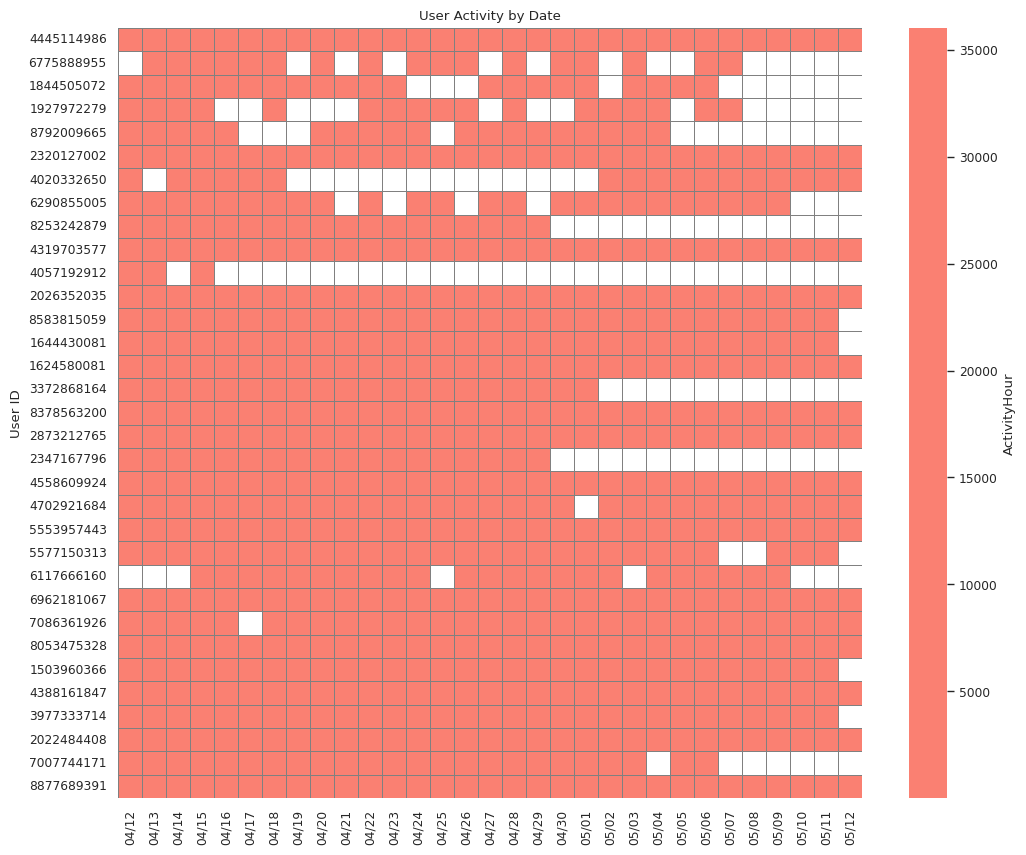

In [40]:
import matplotlib.colors as colors

# Define the custom colormap
cmap = colors.ListedColormap(['white', 'salmon'])

# create heatmap
sns.set_style("white")
fig, ax = plt.subplots(figsize=(12, 10))
heatmap = sns.heatmap(df_pivot_sorted, cmap=cmap, linewidths=0.5, center=0, linecolor='gray', ax=ax, cbar=True, cbar_kws={'label': 'ActivityHour'})

# add title and axis labels
ax.set_title('User Activity by Date')
ax.set_xlabel('')
ax.set_ylabel('User ID')

fig.savefig('User Activity by Date.png', transparent=True, bbox_inches='tight')

plt.show()

## 3-4 Average User
- 8319 steps
- 5.98 km
  - Very Active: 23 min / 1.63 km
  - Fairly Active: 14.77 min / 0.62 km
  - Lightly Active: 3.5 hr (210 min) / 3.64 km
  - Sedentary: 15.9 hr（955 min） / 1.7 m
  - Sleep: 7 hr（419 min）
  - In bed but not asleep: 39 min（458 - 419 min）

> 💡 **Finding**: Most users' activity levels and sleep duration do not meet health standards.
  - The average daily step count for users is 8319 steps, and **79% of users do not reach the healthy standard** of 10,000 steps.
  - Users spend **an average of 80% of their time in a sedentary state**.

## 3-5 4 types of groups

### Type v.s. Steps

In [41]:
user_avg_df = analysis_df.groupby(['Id']).agg({'TotalSteps': 'mean'})

# join user segement label
user_avg_df = pd.merge(user_avg_df, user_seg_df[['Id', 'activity_bin']], on='Id')
user_avg_df.head()

,Id,TotalSteps,activity_bin
0,1503960366,12520.633333,VeryActive
1,1624580081,5743.903226,Lightly
2,1644430081,7282.966667,Lightly
3,1844505072,3808.666667,Sedentary
4,1927972279,1670.588235,Sedentary


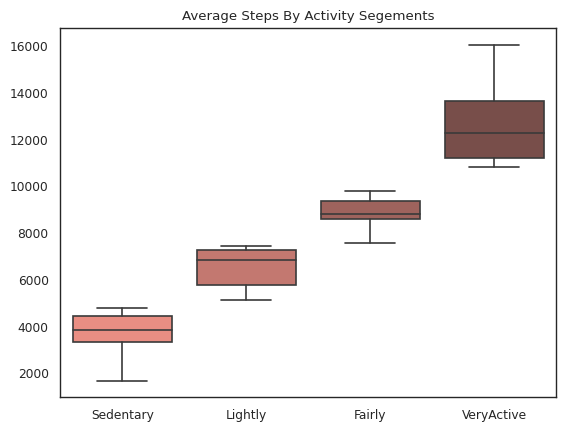

In [42]:
# set the color palette to green
sns.set_palette(sns.color_palette("dark:salmon_r"))

# Usual boxplot
sns.boxplot(x='activity_bin', y='TotalSteps', data=user_avg_df)
plt.title('Average Steps By Activity Segements')
plt.xlabel('')
plt.ylabel('')
plt.show()

### Types v.s. Calories

In [43]:
user_avg_df = analysis_df.groupby(['Id']).agg({'Calories': 'mean'})

# join user segement label
user_avg_df = pd.merge(user_avg_df, user_seg_df[['Id', 'activity_bin']], on='Id')
user_avg_df.head()

,Id,Calories,activity_bin
0,1503960366,1876.966667,VeryActive
1,1624580081,1483.354839,Lightly
2,1644430081,2811.300000,Lightly
3,1844505072,1713.761905,Sedentary
4,1927972279,2303.058824,Sedentary


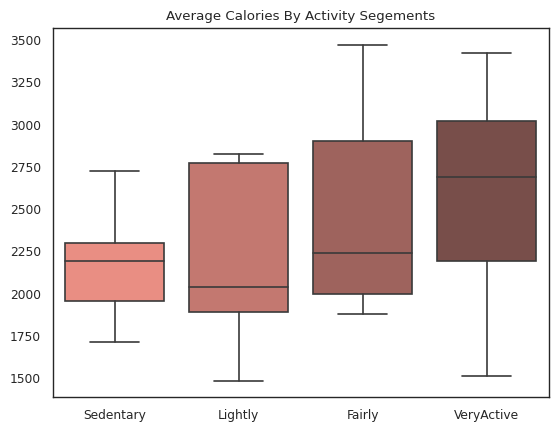

In [44]:
# set the color palette to green
sns.set_palette(sns.color_palette("dark:salmon_r"))

# Usual boxplot
sns.boxplot(x='activity_bin', y='Calories', data=user_avg_df)
plt.title('Average Calories By Activity Segements')
plt.xlabel('')
plt.ylabel('')
plt.show()

### Types v.s. Sleep Time

In [45]:
user_sleep_df = analysis_df[['Id', 'ActivityDate', 'TotalMinutesAsleep']].groupby(['Id']).agg({'TotalMinutesAsleep': 'mean'})
user_sleep_df = user_sleep_df.reset_index()

# Classify data into bins
user_sleep_df['sleep_bin'] = pd.cut(user_sleep_df['TotalMinutesAsleep'], bins=[0, 420, 540, float('inf')], labels=['Light', 'Moderate', 'Long'])
user_sleep_df['TotalHoursAsleep'] = user_sleep_df['TotalMinutesAsleep']/60
user_sleep_df.head()

,Id,TotalMinutesAsleep,sleep_bin,TotalHoursAsleep
0,1503960366,360.28,Light,6.004667
1,1624580081,NaN,NaN,NaN
2,1644430081,294.00,Light,4.900000
3,1844505072,652.00,Long,10.866667
4,1927972279,417.00,Light,6.950000


In [46]:
# join user segement label
user_df = pd.merge(user_sleep_df, user_seg_df[['Id', 'activity_bin']], on='Id')

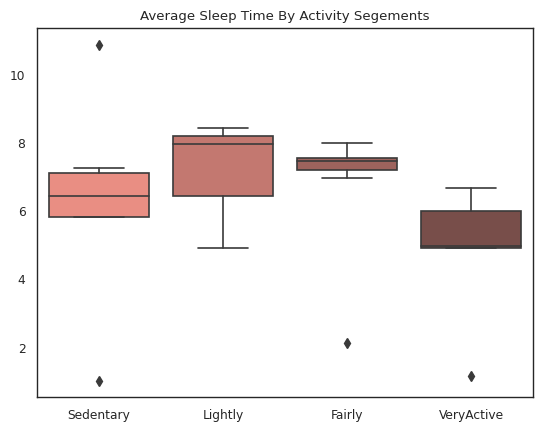

In [47]:
# set the color palette to green
sns.set_palette(sns.color_palette("dark:salmon_r"))

# Usual boxplot
sns.boxplot(x='activity_bin', y='TotalHoursAsleep', data=user_df)
plt.title('Average Sleep Time By Activity Segements')
plt.xlabel('')
plt.ylabel('')
plt.show()

### Types v.s Intensity

In [48]:
col = ['LightlyActiveMinutes', 'SedentaryMinutes', 'FairlyActiveMinutes', 'VeryActiveMinutes', 'activity_bin']
active_df = analysis_df[col]

In [49]:
data = active_df.groupby(['activity_bin']).agg({'LightlyActiveMinutes': 'mean',
                                         'SedentaryMinutes': 'mean',
                                         'FairlyActiveMinutes': 'mean',
                                         'VeryActiveMinutes': 'mean'})
data

,LightlyActiveMinutes,SedentaryMinutes,FairlyActiveMinutes,VeryActiveMinutes
activity_bin,,,,
Sedentary,153.542484,1079.764706,5.660131,5.013072
Lightly,207.495413,1061.022936,10.866972,7.307339
Fairly,232.785211,795.165493,16.989437,29.566901
VeryActive,223.110577,973.466346,22.552885,43.774038


## 3-6 Labeling: Usage Days
Divide into two labels based on the **total number of usage days** during 4/12-5/12. The average usage period of 26 days for users is used as the benchmark.
- Low: less than 26
- High: higher than 26


In [50]:
# 根據平均步數分群
usage_df = analysis_df.groupby('Id').agg({'ActivityDate': 'count'})

# Reset the index to a simple RangeIndex
usage_df = usage_df.reset_index()

# Classify data into bins
usage_df['usage_bin'] = pd.cut(usage_df['ActivityDate'], bins=[0, 26, float('inf')], labels=['Low', 'High'])

usage_df.head()

,Id,ActivityDate,usage_bin
0,1503960366,30,High
1,1624580081,31,High
2,1644430081,30,High
3,1844505072,21,Low
4,1927972279,17,Low


In [51]:
usage_df.groupby('usage_bin').count()

,Id,ActivityDate
usage_bin,,
Low,12,12
High,21,21


## 3-7 Feature Usage Rate
The following calculates the usage rates of the four features (activity, sleep, heart rate, weight) among users.


```
usage rate for each feature = the number of users who have used that feature / the total number of users (33 people).
```



In [52]:
# Collect Id lists of functions
sleep_id = list(d_sleep_df.groupby('Id').count().index)
activity_id = list(analysis_df.groupby('Id').count().index)
weight_id = list(weight_df.groupby('Id').count().index)
heart_id = list(s_heartrate_df.groupby('Id').count().index)

# Combine the lists and remove duplicates
all_ids = list(set(sleep_id + activity_id + weight_id + heart_id))

# Create an empty dictionary to store the data
data = {'sleep': [], 'activity': [], 'weight': [], 'heart': []}

# Populate the dictionary with 0s and 1s based on whether each Id is in the corresponding list
for i in all_ids:
    data["sleep"].append(int(i in sleep_id))
    data["activity"].append(int(i in activity_id))
    data["weight"].append(int(i in weight_id))
    data["heart"].append(int(i in heart_id))

# Create a DataFrame from the dictionary
function_df = pd.DataFrame(data=data, index=all_ids)

function_df["total_functions"] = function_df["activity"] + function_df["heart"] + function_df["sleep"]
function_df = function_df.reset_index().rename(columns={"index": "Id"})

print(function_df.head())

           Id  sleep  activity  weight  heart  total_functions
0  8053475328      1         1       0      0                2
1  1644430081      1         1       0      0                2
2  8378563200      1         1       0      0                2
3  4558609924      1         1       1      1                3
4  8583815059      0         1       0      0                1


In [53]:
# Merge the dataframes on the "id" column
id_df = pd.merge(function_df, user_seg_df[['Id', 'activity_bin']], on="Id")
id_df = pd.merge(id_df, usage_df[['Id', 'usage_bin']], on="Id")
id_df.head()

,Id,sleep,activity,weight,heart,total_functions,activity_bin,usage_bin
0,8053475328,1,1,0,0,2,VeryActive,High
1,1644430081,1,1,0,0,2,Lightly,High
2,8378563200,1,1,0,0,2,Fairly,High
3,4558609924,1,1,1,1,3,Fairly,High
4,8583815059,0,1,0,0,1,Lightly,High


In [54]:
function_percent_df = id_df.groupby('usage_bin').agg({'sleep': 'sum', 'activity': 'sum', 'weight': 'sum', 'heart': 'sum'})
function_percent_df

,sleep,activity,weight,heart
usage_bin,,,,
Low,8,12,1,6
High,16,21,7,8


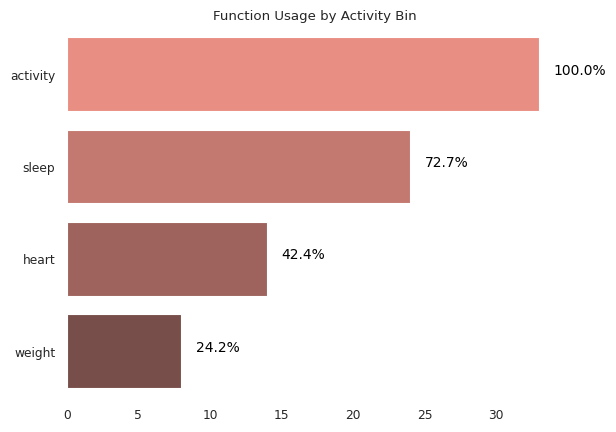

In [55]:
# create a dataframe with the counts of each function
counts = id_df[['sleep', 'activity', 'weight', 'heart']].sum().reset_index(name='count')

# sort DataFrame by Percentage column in descending order
counts = counts.sort_values(by='count', ascending=False)

# create a horizontal bar chart with the counts as the values and the function names as the labels
sns.set_style('white')
colors = sns.set_palette(sns.color_palette("dark:salmon_r"))
ax = sns.barplot(x='count', y='index', data=counts, palette=colors)

# add percentage labels to each bar
for i, v in enumerate(counts['count']):
    percentage = '{:.1f}%'.format(100 * v / 33)
    ax.text(v + 1, i, percentage, color='black', fontsize=10)

# set the axis labels and title
plt.xlabel('')
plt.ylabel('')
plt.title('Function Usage by Activity Bin')

# remove the frame around the plot
plt.box(False)
plt.savefig('Function Usage by Activity Bin.png', transparent=True, bbox_inches='tight')

# show the plot
plt.show()

> 💡 **Finding**: FitBit's four main features are not all being used, with the weight function having the lowest usage rate of only 24.2%.

Here, I want to compare the usage rates and frequencies of different product functions among users from different groups (based on usage days and activity level).

### Activity Group

#### Active Frequency

In [56]:
analysis_df_ = analysis_df.groupby('Id').agg({'ActivityDate': 'count'})
analysis_df_ = pd.merge(analysis_df_, usage_df[['Id', 'usage_bin']], on="Id")
analysis_df_.groupby('usage_bin').agg({'ActivityDate': 'mean'})

,ActivityDate
usage_bin,
Low,18.416667
High,30.571429


#### Sleep Frequency

In [57]:
sleep_df = d_sleep_df.groupby('Id').agg({'SleepDay': 'count'})
sleep_df = pd.merge(sleep_df, usage_df[['Id', 'usage_bin']], on="Id")
sleep_df.groupby('usage_bin').agg({'SleepDay': 'mean'})

,SleepDay
usage_bin,
Low,8.6250
High,21.3125


#### HeartRate Frequency

In [58]:
s_heartrate_df['Time'] = s_heartrate_df['Time'].apply(lambda x: x.split(" ", 1)[0])
s_heartrate_df['Time'] = pd.to_datetime(s_heartrate_df.Time)
s_heartrate_df['Date'] = s_heartrate_df['Time'].dt.strftime('%m/%d')

heart_df = s_heartrate_df.groupby(['Id', 'Date']).count().reset_index()
heart_df = heart_df.groupby('Id').agg({'Date': 'count'})
heart_df = pd.merge(heart_df, usage_df[['Id', 'usage_bin']], on="Id")
heart_df.groupby('usage_bin').agg({'Date': 'mean'})

,Date
usage_bin,
Low,19.500
High,27.125


#### Weight Frequency

In [59]:
weight_df['Date'] = pd.to_datetime(weight_df.Date)
weight_df['Date'] = weight_df['Date'].dt.strftime('%m/%d')
weight_df_ = weight_df.groupby('Id').agg({'Date': 'count'})
weight_df_ = pd.merge(weight_df_, usage_df[['Id', 'usage_bin']], on="Id")
weight_df_.groupby('usage_bin').agg({'Date': 'mean'})

,Date
usage_bin,
Low,1.000000
High,9.428571


### Usage Group

In [60]:
# Merge the dataframes on the "id" column
id_df = pd.merge(function_df, user_seg_df[['Id', 'activity_bin']], on="Id")
id_df = pd.merge(id_df, usage_df[['Id', 'usage_bin']], on="Id")
id_df.head()

,Id,sleep,activity,weight,heart,total_functions,activity_bin,usage_bin
0,8053475328,1,1,0,0,2,VeryActive,High
1,1644430081,1,1,0,0,2,Lightly,High
2,8378563200,1,1,0,0,2,Fairly,High
3,4558609924,1,1,1,1,3,Fairly,High
4,8583815059,0,1,0,0,1,Lightly,High


In [61]:
function_percent_df = id_df.groupby('usage_bin').agg({'sleep': 'sum', 'activity': 'sum', 'weight': 'sum', 'heart': 'sum'})
function_percent_df

,sleep,activity,weight,heart
usage_bin,,,,
Low,8,12,1,6
High,16,21,7,8


#### Active Frequency

In [62]:
analysis_df_ = analysis_df.groupby('Id').agg({'ActivityDate': 'count'})
analysis_df_ = pd.merge(analysis_df_, user_seg_df[['Id', 'activity_bin']], on="Id")
analysis_df_.groupby('activity_bin').agg({'ActivityDate': 'mean'})

,ActivityDate
activity_bin,
Sedentary,21.857143
Lightly,24.222222
Fairly,28.400000
VeryActive,29.714286


#### Sleep Frequency

In [63]:
sleep_df = d_sleep_df.groupby('Id').agg({'SleepDay': 'count'})
sleep_df = pd.merge(sleep_df, user_seg_df[['Id', 'activity_bin']], on="Id")
sleep_df.groupby('activity_bin').agg({'SleepDay': 'mean'})

,SleepDay
activity_bin,
Sedentary,9.000000
Lightly,19.333333
Fairly,23.111111
VeryActive,16.200000


#### HeartRate Frequency

In [64]:
# s_heartrate_df['Time'] = s_heartrate_df['Time'].apply(lambda x: x.split(" ", 1)[0])
# s_heartrate_df['Time'] = pd.to_datetime(s_heartrate_df.Time)
# s_heartrate_df['Date'] = s_heartrate_df['Time'].dt.strftime('%m/%d')

heart_df = s_heartrate_df.groupby(['Id', 'Date']).count().reset_index()
heart_df = heart_df.groupby('Id').agg({'Date': 'count'})
heart_df = pd.merge(heart_df, user_seg_df[['Id', 'activity_bin']], on="Id")
heart_df.groupby('activity_bin').agg({'Date': 'mean'})

,Date
activity_bin,
Sedentary,17.333333
Lightly,4.000000
Fairly,27.000000
VeryActive,29.000000


#### Weight Frequency

In [65]:
# weight_df['Date'] = pd.to_datetime(weight_df.Date)
# weight_df['Date'] = weight_df['Date'].dt.strftime('%m/%d')
# weight_df_ = weight_df.groupby('Id').agg({'Date': 'count'})
weight_df_ = pd.merge(weight_df_, user_seg_df[['Id', 'activity_bin']], on="Id")
weight_df_.groupby('activity_bin').agg({'Date': 'mean'})

,Date
activity_bin,
Sedentary,1.0
Lightly,2.0
Fairly,9.5
VeryActive,13.0


In [66]:
id_df.groupby(['weight', 'activity_bin'])['weight'].count().unstack(fill_value=0)

activity_bin,Sedentary,Lightly,Fairly,VeryActive
weight,,,,
0,6,8,6,5
1,1,1,4,2


> 💡 **Finding** 
- **40% of light activity users only use the activity function** and do not use the other three functions.
- Medium & intense activity users have higher than average usage rates for both heart rate and weight functions.
- 67% of **Fairly activity users** use the sleep function, but **with a low frequency**, recording only about once every 4 days on average.
- 62% of heavy users have **never used the heart rate function**.

## 3-8 Sleep Time
Divide into the following three types based on the **user's daily average sleep hours**.
- Long: > 9 hours
- Moderate: 7-9 hours
- Light: < 7 hours

In [67]:
user_sleep_df = analysis_df[['Id', 'ActivityDate', 'TotalMinutesAsleep']].groupby(['Id']).agg({'TotalMinutesAsleep': 'mean'})
user_sleep_df = user_sleep_df.reset_index()

# Classify data into bins
user_sleep_df['sleep_bin'] = pd.cut(user_sleep_df['TotalMinutesAsleep'], bins=[0, 420, 540, float('inf')], labels=['< 7 hours', '7-9 hours', '> 9 hours'])
user_sleep_df['TotalHoursAsleep'] = user_sleep_df['TotalMinutesAsleep']/60
user_sleep_df.head()

,Id,TotalMinutesAsleep,sleep_bin,TotalHoursAsleep
0,1503960366,360.28,< 7 hours,6.004667
1,1624580081,NaN,NaN,NaN
2,1644430081,294.00,< 7 hours,4.900000
3,1844505072,652.00,> 9 hours,10.866667
4,1927972279,417.00,< 7 hours,6.950000


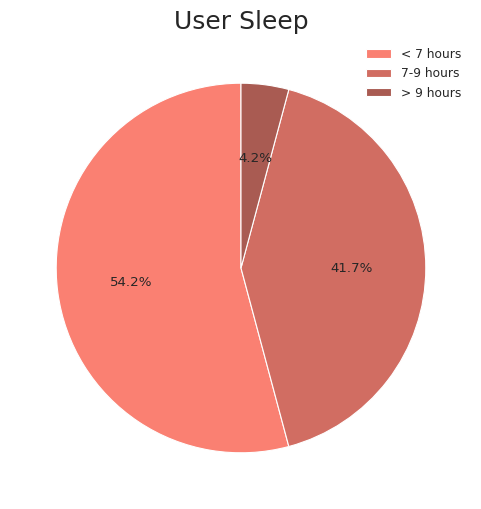

In [68]:
counts = user_sleep_df.groupby('sleep_bin').size()

plt.figure(figsize=(6, 6))
plt.title('User Sleep', fontsize=18)

sns.set_palette(sns.color_palette("dark:salmon_r"))
sns.set_context('paper')

# Create the plot using seaborn
plt.pie(counts, labels=None, autopct='%1.1f%%', startangle=90)

# Add legend
plt.legend(counts.index, loc='upper right', frameon=False)
plt.savefig('User Sleep.png', transparent=True, bbox_inches='tight')

plt.show()

> 💡 **Finding**: **54.2% of users** do not reach the recommended sleep duration.

## 3-9 Average Steps




### Average Steps By Day

In [70]:
df_barh_count = analysis_df.groupby(['weekday']).agg({'TotalSteps': 'mean'})
df_barh_count.head()

,TotalSteps
weekday,
Friday,7820.641667
Monday,8488.218182
Saturday,8946.628319
Sunday,7626.554545
Thursday,8185.398496


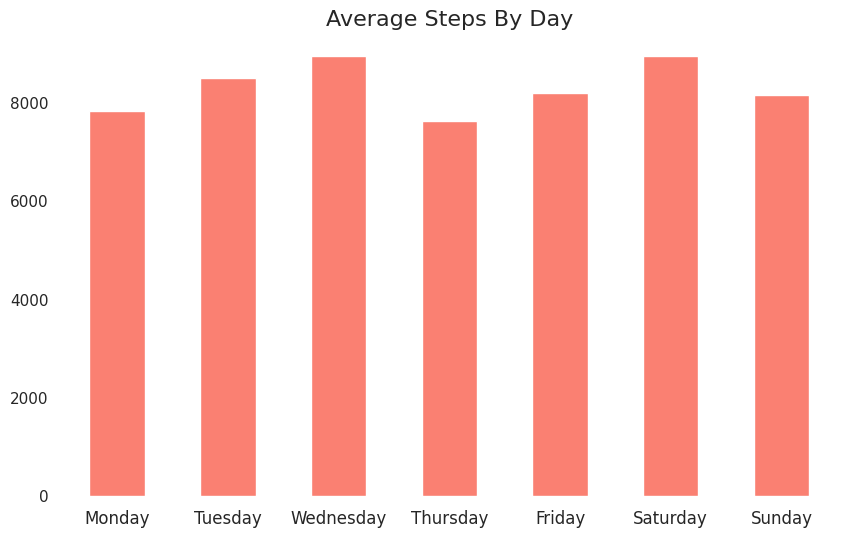

In [83]:
# Set the order of the days
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create the plot using seaborn
sns.set(style='white')
fig, ax = plt.subplots(figsize=(8, 6))
df_barh_count.plot(kind='bar', stacked=True, figsize=(10, 6), rot=0, color='Salmon', ax=ax)

# Set the legend
ax.legend([],[], frameon=False) 

# Set the figure borders
sns.despine(fig=fig, ax=ax, top=True, bottom=True, left=True, right=True)

# Set the x-axis tick labels and title
ax.set_xticklabels(weekday_order, fontsize=12)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('', fontsize=12)
ax.set_title('Average Steps By Day', fontsize=16)

fig.savefig('Average Steps By Day.png', transparent=True, bbox_inches='tight')

# Show the plot
plt.show()

In [84]:
avg_step_df = analysis_hf.groupby('Hour').agg({'StepTotal': 'mean'})
avg_step_df = avg_step_df.reset_index()
avg_step_df.sort_values('StepTotal', ascending=False)

,Hour,StepTotal
18,18:00,599.169978
19,19:00,583.390728
17,17:00,550.232892
12,12:00,548.642082
14,14:00,540.513572
13,13:00,537.698154
16,16:00,496.845645
10,10:00,481.665231
11,11:00,456.886731
9,09:00,433.301826


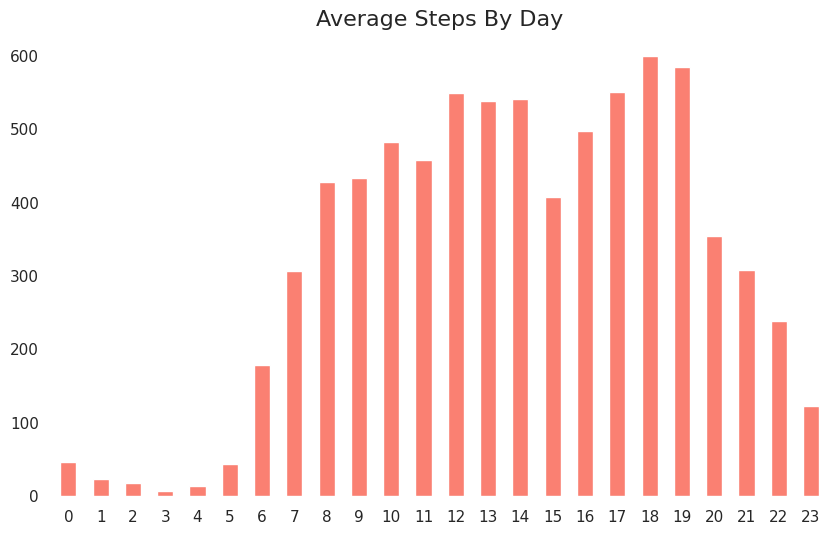

In [85]:
# Set the order of the days
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create the plot using seaborn
sns.set(style='white')
fig, ax = plt.subplots(figsize=(8, 6))
avg_step_df.plot(kind='bar', stacked=True, figsize=(10, 6), rot=0, color='Salmon', ax=ax)

# Set the legend
ax.legend([],[], frameon=False) 

# Set the figure borders
sns.despine(fig=fig, ax=ax, top=True, bottom=True, left=True, right=True)

# Set the x-axis tick labels and title
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('', fontsize=12)
ax.set_title('Average Steps By Day', fontsize=16)

fig.savefig('Average Steps By Hour.png', transparent=True, bbox_inches='tight')

# Show the plot
plt.show()

> 💡 **Finding**
  - User activity levels are higher on **Wednesdays and Saturdays.**
  - Users are most active in the **12:00-14:00 & 17:00-19:00** time slots.

# 4 Insight Summary & Actionable Suggestions 

## Summary
1. From April 12th to May 12th, FitBit's **daily active user (DAU) showed a continuous decline**, with two poorly performing user segments: **Sedentary & Lightly segements.**
  - The daily active device users (DAU) of FitBit have been continuously declining. (3-1)
  - The number of Sedentary users fluctuates greatly, ranging from 3 to 7 users. (3-3)
  - After using the device for two weeks, there is **an increase in user churn**, especially among **lightly activity users**, who lost 66% of their original 9 users, leaving only 3 users. (3-3)
  - **Strong activity users have almost no interruptions in usage**, maintaining a stable user count of about 7. (3-3)
  - **More than 40% of users are power users**, who have been using the device for one month or more. (3-2)
    
  In a nutshell, FitBit needs to focus on retaining lightly activity users, as they account for 30.3% of the total user base.
    
2. FitBit's four main features are not all being used, with the **weight function having the lowest usage rate of only 24.2%**.
  - **40% of light activity users only use the activity function** and do not use the other three functions.  (3-7)
  - Medium & intense activity users have higher than average usage rates for both heart rate and weight functions. (3-7)
  - 67% of **Fairly activity users** use the sleep function, but **with a low frequency**, recording only about once every 4 days on average. (3-7)
  - 62% of heavy users have **never used the heart rate function**. (3-7)
3. Most users' activity levels and sleep duration do not meet health standards.
  - The average daily step count for users is 8319 steps, and **79% of users do not reach the healthy standard** of 10,000 steps. (3-4)
  - Users spend **an average of 80% of their time in a sedentary state**. (3-4)
  - User activity levels are higher on **Wednesdays and Saturdays.** (3-9)
  - Users are most active in the **12:00-14:00 & 17:00-19:00** time slots. ****(3-9)
  - **54.2% of users** do not reach the recommended sleep duration. (3-8)

## Actionable Suggestion
**Marketing suggestions:**

1. Provide health and fitness-related videos or blog content while promoting Bellabeat's app, which offers health insights to users such as tips on avoiding prolonged sitting and increasing daily steps. Also, promote the heart rate feature to heavily user can increase user engagement and loyalty.
2. Personalize app reminders to improve user retention. For example, send friendly reminders during lunchtime and before work ends, and offer appropriate exercise recommendations based on the time of day. Additionally, gamify features such as daily check-ins and rewards to increase user interaction and participation.

**Product analysis suggestions:**

1. Optimize the product by designing weight and heart rate versions for different activity levels, such as tracking weight gain/loss goals and monitoring maximum exercise and daily heart rates to meet the diverse needs of users. Additionally, add sleep-related features such as meditation to meet users' all-around needs.
2. Develop an "every wear" series to make daily wear more comfortable. This can increase user satisfaction, loyalty, and attract more new users to join.